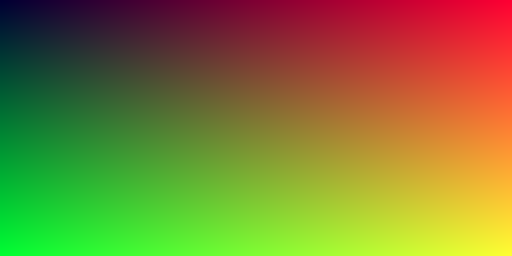

In [1]:
from PIL import Image
import numpy as np

screen_size = (256, 512)

height, width = screen_size
image_array = np.ones(screen_size, dtype=np.uint32)

for x in range(width):
    for y in range(height):
        r = x / width
        g = y / height
        b = 0.2
        image_array[y][x] =  0xff000000 + 0x10000 * int(b * 0xff) + 0x100 * int(g * 0xff) + r * 0xff

Image.fromarray(image_array, mode="RGBA")

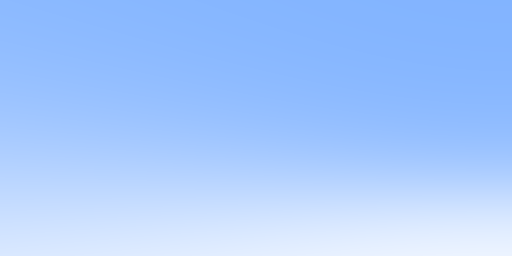

In [2]:
from PIL import Image
import numpy as np

def color(ray):
    t = 0.5 * (ray.direction[1] + 1.) 
    c = (1. - t) * np.array((1., 1., 1.)) + t * np.array((0.5, 0.7, 1))
    c = (c * 0xff).astype(np.uint32)
    return 0xff000000 + 0x10000 * c[2]+ 0x100 * c[1]+ c[0]
    
    
class Ray(object):
    def __init__(self, src, dst):
        delta = (dst - src)
        self.k = delta / np.linalg.norm(delta)
        self.b = src
    
    @property
    def origin(self):
        return self.b
    
    @property
    def direction(self):
        return self.k
    
    def point_at_t(self, t):
        return self.b + t * self.k
    
origin = np.array((0, 0, 0))
screen_size = (256, 512)
screen_origin = np.array((-2, -1, -1))
screen_v = np.array((0, 4, 0))
screen_h = np.array((2, 0, 0))

height, width = screen_size
image_array = np.ones(screen_size, dtype=np.uint32)

for x in range(width):
    for y in range(height):
        ray = Ray(origin, screen_origin + screen_h * x / width + screen_v * y / height)
        image_array[height - 1 - y][x] = color(ray)

image_array = image_array.astype(np.uint32)
Image.fromarray(image_array, mode="RGBA")

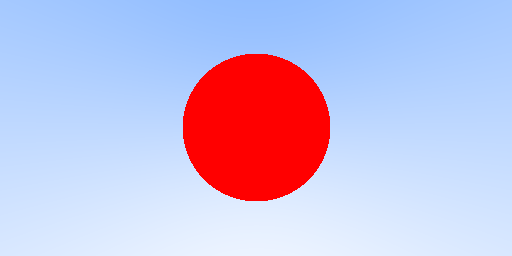

In [3]:
from PIL import Image
import numpy as np

def hit_sphere(center, radius, ray):
    oc = ray.origin - center
    a = np.dot(ray.direction, ray.direction)
    b = 2. * np.dot(oc, ray.direction)
    c = np.dot(oc, oc) - np.dot(radius, radius)
    return b * b - 4 * a * c > 0
    
def color(ray):
    if hit_sphere(np.array((0, 0, -1)), 0.5, ray):
        return 0xff0000ff
    
    t = 0.5 * (ray.direction[1] + 1.) 
    c = (1. - t) * np.array((1., 1., 1.)) + t * np.array((0.5, 0.7, 1))
    c = (c * 0xff).astype(np.uint8)
    return 0xff000000 + 0x10000 * c[2]+ 0x100 * c[1]+ c[0]
    
    
class Ray(object):
    def __init__(self, src, dst):
        delta = (dst - src)
        self.k = delta / np.linalg.norm(delta)
        self.b = src
    
    @property
    def origin(self):
        return self.b
    
    @property
    def direction(self):
        return self.k
    
    def point_at_t(self, t):
        return self.b + t * self.k
    
origin = np.array((0, 0, 0))
screen_size = (256, 512)
screen_origin = np.array((-2, -1, -1))
screen_v = np.array((0, 2, 0))
screen_h = np.array((4, 0, 0))

height, width = screen_size
image_array = np.ones(screen_size, dtype=np.uint32)

for x in range(width):
    for y in range(height):
        ray = Ray(origin, screen_origin + screen_h * x / width + screen_v * y / height)
        image_array[height - 1 - y][x] = color(ray)

image_array = image_array.astype(np.uint32)
Image.fromarray(image_array, mode="RGBA")

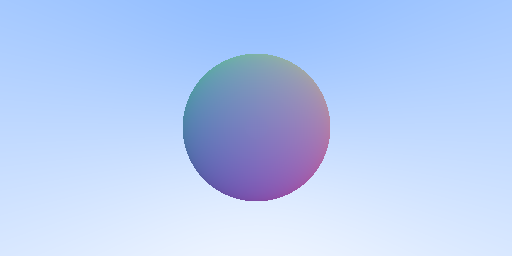

In [4]:
from PIL import Image
import numpy as np

def hit_sphere(center, radius, ray):
    oc = ray.origin - center
    a = np.dot(ray.direction, ray.direction)
    b = 2. * np.dot(oc, ray.direction)
    c = np.dot(oc, oc) - np.dot(radius, radius)
    discriminant = b * b - 4 * a * c
    if discriminant < 0:
        return -1.
    else:
        return (- b - np.sqrt(discriminant)) / (2 * a)
    
def color(ray):
    t = hit_sphere(np.array((0, 0, -1)), 0.5, ray)
    if t > 0:
        c = ray.point_at_t(t) - np.array((0, 0, -1))
        c += 1
        c *= 0.5
        c = (c * 0xff).astype(np.uint8)
        return 0xff000000 + 0x10000 * c[2]+ 0x100 * c[1]+ c[0]
    
    t = 0.5 * (ray.direction[1] + 1.) 
    c = (1. - t) * np.array((1., 1., 1.)) + t * np.array((0.5, 0.7, 1))
    c = (c * 0xff).astype(np.uint8)
    return 0xff000000 + 0x10000 * c[2]+ 0x100 * c[1]+ c[0]
    
    
class Ray(object):
    def __init__(self, src, dst):
        delta = (dst - src)
        self.k = delta / np.linalg.norm(delta)
        self.b = src
    
    @property
    def origin(self):
        return self.b
    
    @property
    def direction(self):
        return self.k
    
    def point_at_t(self, t):
        return self.b + t * self.k
    
origin = np.array((0, 0, 0))
screen_size = (256, 512)
screen_origin = np.array((-2, -1, -1))
screen_v = np.array((0, 2, 0))
screen_h = np.array((4, 0, 0))

height, width = screen_size
image_array = np.ones(screen_size, dtype=np.uint32)

for x in range(width):
    for y in range(height):
        ray = Ray(origin, screen_origin + screen_h * x / width + screen_v * y / height)
        image_array[height - 1 - y][x] = color(ray)

image_array = image_array.astype(np.uint32)
Image.fromarray(image_array, mode="RGBA")

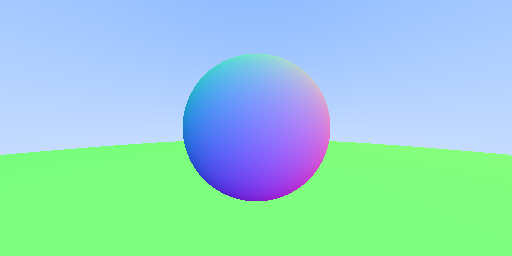

In [5]:
from PIL import Image
import numpy as np

class Ray(object):
    def __init__(self, src, dst):
        delta = (dst - src)
        self.k = delta / np.linalg.norm(delta)
        self.b = src
    
    @property
    def origin(self):
        return self.b
    
    @property
    def direction(self):
        return self.k
    
    def point_at_t(self, t):
        return self.b + t * self.k

class HitPoint(object):
    def __init__(self, ray, obj, t, point, normal):
        self.ray = ray
        self.obj = obj
        self.t = t
        self.point = point
        self.normal = normal

class Sphere(object):
    def __init__(self, center, radius):
        self.center = center
        self.radius = radius
    
    def find_hit_point(self, ray):
        oc = ray.origin - self.center
        a = np.dot(ray.direction, ray.direction)
        b = np.dot(oc, ray.direction)
        c = np.dot(oc, oc) - np.dot(self.radius, self.radius)
        discriminant = b * b - a * c
        
        hit_points = []
        
        if discriminant > 0:
            t1 = (- b - np.sqrt(discriminant))/ a
            p1 = ray.point_at_t(t1)
            n1 = (p1 - self.center) / self.radius
            t2 = (- b + np.sqrt(discriminant))/ a
            p2 = ray.point_at_t(t2)
            n2 = (p2 - self.center) / self.radius
            hit_points.append(HitPoint(ray, self, t1, p1, n1))
            hit_points.append(HitPoint(ray, self, t2, p2, n2))
            
        return hit_points 

def find_hit_point(obj_list, ray):
    hit_points = []
    for obj in obj_list:
        hits = obj.find_hit_point(ray)
        hit_points.extend(hits)
    
    return hit_points


def color(obj_list, ray):
    hit_points = find_hit_point(obj_list, ray)
    hit_points = list(filter(lambda x: x.t > 0.001, hit_points))
    
    if hit_points:
        hit_points.sort(key=lambda x: x.t)
        c = hit_points[0].normal
        c += 1
        c *= 0.5
        c = (c * 0xff).astype(np.uint8)
        return 0xff000000 + 0x10000 * c[2]+ 0x100 * c[1]+ c[0]
    
    t = 0.5 * (ray.direction[1] + 1.) 
    c = (1. - t) * np.array((1., 1., 1.)) + t * np.array((0.5, 0.7, 1))
    c = (c * 0xff).astype(np.uint8)
    return 0xff000000 + 0x10000 * c[2]+ 0x100 * c[1]+ c[0]
    
origin = np.array((0, 0, 0))
screen_size = (256, 512)
screen_origin = np.array((-2, -1, -1))
screen_v = np.array((0, 2, 0))
screen_h = np.array((4, 0, 0))

height, width = screen_size
image_array = np.ones(screen_size, dtype=np.uint32)

obj_list = [Sphere(np.array((0, -100.5, -1.)), 100), Sphere(np.array((0, 0, -1.)), 0.5)]

for x in range(width):
    for y in range(height):
        ray = Ray(origin, screen_origin + screen_h * x / width + screen_v * y / height)
        image_array[height - 1 - y][x] = color(obj_list, ray)

image_array = image_array.astype(np.uint32)
Image.fromarray(image_array, mode="RGBA")

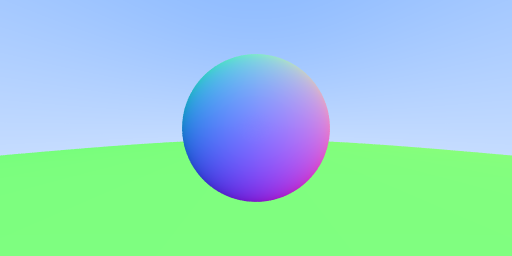

In [6]:
from PIL import Image
import numpy as np
import numpy.random as random

class Camera(object):
    def __init__(self):
        self.origin = np.array((0, 0, 0))
        self.horizontal = np.array((4, 0, 0))
        self.vertical = np.array((0, 2, 0))
        
        self.screen_origin = np.array((-2, -1, -1))
        
    def get_ray(self, u, v):
        return Ray(self.origin, self.screen_origin + self.horizontal * u + self.vertical * v)

class Ray(object):
    def __init__(self, src, dst):
        delta = (dst - src)
        self.k = delta / np.linalg.norm(delta)
        self.b = src
    
    @property
    def origin(self):
        return self.b
    
    @property
    def direction(self):
        return self.k
    
    def point_at_t(self, t):
        return self.b + t * self.k

class HitPoint(object):
    def __init__(self, ray, obj, t, point, normal):
        self.ray = ray
        self.obj = obj
        self.t = t
        self.point = point
        self.normal = normal

class Sphere(object):
    def __init__(self, center, radius):
        self.center = center
        self.radius = radius
    
    def find_hit_point(self, ray):
        oc = ray.origin - self.center
        a = np.dot(ray.direction, ray.direction)
        b = np.dot(oc, ray.direction)
        c = np.dot(oc, oc) - np.dot(self.radius, self.radius)
        discriminant = b * b - a * c
        
        hit_points = []
        
        if discriminant > 0:
            t1 = (- b - np.sqrt(discriminant))/ a
            p1 = ray.point_at_t(t1)
            n1 = (p1 - self.center) / self.radius
            t2 = (- b + np.sqrt(discriminant))/ a
            p2 = ray.point_at_t(t2)
            n2 = (p2 - self.center) / self.radius
            hit_points.append(HitPoint(ray, self, t1, p1, n1))
            hit_points.append(HitPoint(ray, self, t2, p2, n2))
            
        return hit_points 

def find_hit_point(obj_list, ray):
    hit_points = []
    for obj in obj_list:
        hits = obj.find_hit_point(ray)
        hit_points.extend(hits)
    
    return hit_points

def color(obj_list, ray):
    hit_points = find_hit_point(obj_list, ray)
    hit_points = list(filter(lambda x: x.t > 0.001, hit_points))
    
    if hit_points:
        hit_points.sort(key=lambda x: x.t)
        c = hit_points[0].normal
        c += 1
        c *= 0.5
        return c
    
    t = 0.5 * (ray.direction[1] + 1.) 
    c = (1. - t) * np.array((1., 1., 1.)) + t * np.array((0.5, 0.7, 1))
    return c
    
screen_size = (256, 512)
# screen_size = (100, 200)
samples = 50
height, width = screen_size
image_array = np.ones(screen_size, dtype=np.uint32)

obj_list = [Sphere(np.array((0, -100.5, -1.)), 100), Sphere(np.array((0, 0, -1.)), 0.5)]

camera = Camera()

for x in range(width):
    for y in range(height):
        c = 0
        for s in range(samples):
            u = (x + random.random()) / width 
            v = (y + random.random()) / height
            ray = camera.get_ray(u, v)
            c += color(obj_list, ray)
        
        c = c / samples
        c = (c * 0xff).astype(np.uint8)
        image_array[height - 1 - y][x] =  0xff000000 + 0x10000 * c[2]+ 0x100 * c[1]+ c[0]

image_array = image_array.astype(np.uint32)
Image.fromarray(image_array, mode="RGBA")

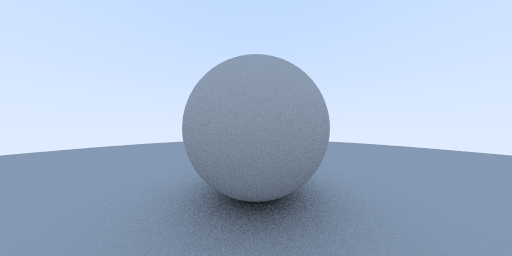

In [7]:
from PIL import Image
import numpy as np
import numpy.random as random

class Camera(object):
    def __init__(self):
        self.origin = np.array((0, 0, 0))
        self.horizontal = np.array((4, 0, 0))
        self.vertical = np.array((0, 2, 0))
        
        self.screen_origin = np.array((-2, -1, -1))
        
    def get_ray(self, u, v):
        return Ray(self.origin, self.screen_origin + self.horizontal * u + self.vertical * v)

class Ray(object):
    def __init__(self, src, dst):
        delta = (dst - src)
        self.k = delta / np.linalg.norm(delta)
        self.b = src
    
    @property
    def origin(self):
        return self.b
    
    @property
    def direction(self):
        return self.k
    
    def point_at_t(self, t):
        return self.b + t * self.k

class HitPoint(object):
    def __init__(self, ray, obj, t, point, normal):
        self.ray = ray
        self.obj = obj
        self.t = t
        self.point = point
        self.normal = normal

class Sphere(object):
    def __init__(self, center, radius):
        self.center = center
        self.radius = radius
    
    def find_hit_point(self, ray):
        oc = ray.origin - self.center
        a = np.dot(ray.direction, ray.direction)
        b = np.dot(oc, ray.direction)
        c = np.dot(oc, oc) - np.dot(self.radius, self.radius)
        discriminant = b * b - a * c
        
        hit_points = []
        
        if discriminant > 0:
            t1 = (- b - np.sqrt(discriminant))/ a
            p1 = ray.point_at_t(t1)
            n1 = (p1 - self.center) / self.radius
            t2 = (- b + np.sqrt(discriminant))/ a
            p2 = ray.point_at_t(t2)
            n2 = (p2 - self.center) / self.radius
            hit_points.append(HitPoint(ray, self, t1, p1, n1))
            hit_points.append(HitPoint(ray, self, t2, p2, n2))
            
        return hit_points 

def find_hit_point(obj_list, ray):
    hit_points = []
    for obj in obj_list:
        hits = obj.find_hit_point(ray)
        hit_points.extend(hits)
    
    return hit_points

def random_in_unit_sphere():
    while True:
        r = (2 * random.random(3) - np.array((1, 1, 1)))
        if np.dot(r, r) <= 1:
            return r

def color(obj_list, ray, depth):
    if depth < 0:
        return np.array((1, 1, 1))
    
    hit_points = find_hit_point(obj_list, ray)
    hit_points = list(filter(lambda x: x.t > 0.001, hit_points))
    
    if hit_points:
        hit_points.sort(key=lambda x: x.t)
        hit_point = hit_points[0]
        
        target = hit_point.point + hit_point.normal + random_in_unit_sphere()
        return 0.5 * color(obj_list, Ray(hit_point.point, target), depth - 1)
    
    t = 0.5 * (ray.direction[1] + 1.) 
    c = (1. - t) * np.array((1., 1., 1.)) + t * np.array((0.5, 0.7, 1))
    return c
    
screen_size = (256, 512)
depth = 10
samples = 50
height, width = screen_size
image_array = np.ones(screen_size, dtype=np.uint32)

obj_list = [Sphere(np.array((0, -100.5, -1.)), 100), Sphere(np.array((0, 0, -1.)), 0.5)]

camera = Camera()

for x in range(width):
    for y in range(height):
        c = 0
        for s in range(samples):
            u = (x + random.random()) / width 
            v = (y + random.random()) / height
            ray = camera.get_ray(u, v)
            c += color(obj_list, ray, depth)
        
        c = c / samples
        c = np.sqrt(c)
        c = (c * 0xff).astype(np.uint8)
        image_array[height - 1 - y][x] = 0xff000000 + 0x10000 * c[2]+ 0x100 * c[1]+ c[0]

image_array = image_array.astype(np.uint32)
Image.fromarray(image_array, mode="RGBA")

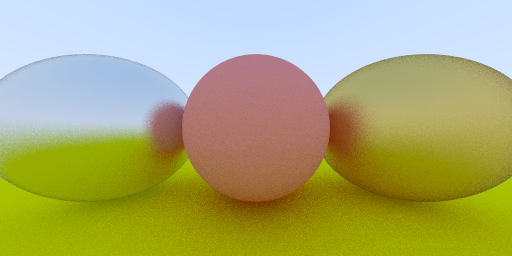

In [8]:
from PIL import Image
import numpy as np
import numpy.random as random


class Camera(object):
    def __init__(self):
        self.origin = np.array((0, 0, 0))
        self.horizontal = np.array((4, 0, 0))
        self.vertical = np.array((0, 2, 0))
        
        self.screen_origin = np.array((-2, -1, -1))
        
    def get_ray(self, u, v):
        return Ray(self.origin, self.screen_origin + self.horizontal * u + self.vertical * v)

    
class Ray(object):
    def __init__(self, src, dst):
        delta = (dst - src)
        self.k = delta / np.linalg.norm(delta)
        self.b = src
    
    @property
    def origin(self):
        return self.b
    
    @property
    def direction(self):
        return self.k
    
    def point_at_t(self, t):
        return self.b + t * self.k

    
class HitPoint(object):
    def __init__(self, ray, obj, t, point, normal):
        self.ray = ray
        self.obj = obj
        self.t = t
        self.point = point
        self.normal = normal


def random_in_unit_sphere():
    while True:
        r = 2 * random.random(3) - np.array((1, 1, 1))
        if np.dot(r, r) <= 1:
            return r
        
class Lambertian(object):
    def __init__(self, albedo):
        self.albedo = albedo 
    
    def scatter(self, ray, hit_point):
        n = hit_point.normal
        p = hit_point.point
        target = p + n + random_in_unit_sphere()
        scattered = Ray(p, target)
        return self.albedo, scattered

class Metal(object):
    def __init__(self, albedo, fuzz):
        self.albedo = albedo
        self.fuzz = max(0, min(1., fuzz))
    
    def scatter(self, ray, hit_point):
        v = ray.direction
        n = hit_point.normal
        p = hit_point.point
        reflected = v - 2 * np.dot(v, n) * n + self.fuzz * random_in_unit_sphere()
        scattered = Ray(p, p + reflected)
        return self.albedo, scattered if np.dot(scattered.direction, n) > 0 else None
    
class Sphere(object):
    def __init__(self, center, radius, material):
        self.center = center
        self.radius = radius
        self.material = material
    
    def find_hit_point(self, ray):
        oc = ray.origin - self.center
        a = np.dot(ray.direction, ray.direction)
        b = np.dot(oc, ray.direction)
        c = np.dot(oc, oc) - np.dot(self.radius, self.radius)
        discriminant = b * b - a * c
        
        hit_points = []
        
        if discriminant > 0:
            t1 = (- b - np.sqrt(discriminant))/ a
            p1 = ray.point_at_t(t1)
            n1 = (p1 - self.center) / self.radius
            t2 = (- b + np.sqrt(discriminant))/ a
            p2 = ray.point_at_t(t2)
            n2 = (p2 - self.center) / self.radius
            hit_points.append(HitPoint(ray, self, t1, p1, n1))
            hit_points.append(HitPoint(ray, self, t2, p2, n2))
            
        return hit_points 

def find_hit_point(obj_list, ray):
    hit_points = []
    for obj in obj_list:
        hits = obj.find_hit_point(ray)
        hit_points.extend(hits)
    
    return hit_points

def color(obj_list, ray, depth):    
    if depth >= 0:
        hit_points = find_hit_point(obj_list, ray)
        hit_points = list(filter(lambda x: x.t > 0.001, hit_points))
    
        if hit_points:
            hit_points.sort(key=lambda x: x.t)
            hit_point = hit_points[0]
            m = hit_point.obj.material
            attenuation, scattered = m.scatter(ray, hit_point)
            return attenuation * color(obj_list, scattered, depth - 1) if scattered else np.array((0., 0., 0.))
    
    t = 0.5 * (ray.direction[1] + 1.) 
    c = (1. - t) * np.array((1., 1., 1.)) + t * np.array((0.5, 0.7, 1))
    return c
    
screen_size = (256, 512)
# screen_size = (100, 200)
depth = 4
samples = 50
height, width = screen_size
image_array = np.ones(screen_size, dtype=np.uint32)

obj_list = [
    Sphere(np.array((0, 0, -1.)), 0.5, Lambertian(np.array((0.8, 0.3, 0.3)))), 
    Sphere(np.array((0, -100.5, -1.)), 100, Lambertian(np.array((0.8, 0.8, 0.)))), 
    Sphere(np.array((1., 0, -1.)), 0.5, Metal(np.array((0.8, 0.6, 0.2)), 0.6)), 
    Sphere(np.array((-1, 0, -1.)), 0.5, Metal(np.array((0.8, 0.8, 0.8)), 0.3)), 
    ]

camera = Camera()

for x in range(width):
    for y in range(height):
        c = 0
        for s in range(samples):
            u = (x + random.random()) / width 
            v = (y + random.random()) / height
            ray = camera.get_ray(u, v)
            c += color(obj_list, ray, depth)
        
        c = c / samples
        c = np.sqrt(c)
        c = (c * 0xff).astype(np.uint8)
        image_array[height - 1 - y][x] = 0xff000000 + 0x10000 * c[2]+ 0x100 * c[1]+ c[0]

image_array = image_array.astype(np.uint32)
Image.fromarray(image_array, mode="RGBA")

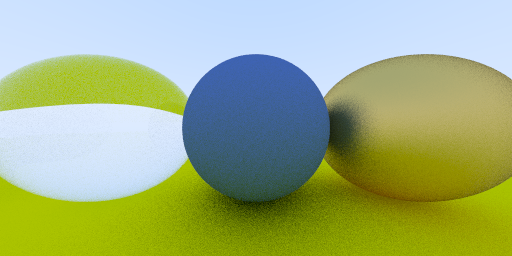

In [9]:
from PIL import Image
import numpy as np
import numpy.random as random


class Camera(object):
    def __init__(self):
        self.origin = np.array((0, 0, 0))
        self.horizontal = np.array((4, 0, 0))
        self.vertical = np.array((0, 2, 0))
        
        self.screen_origin = np.array((-2, -1, -1))
        
    def get_ray(self, u, v):
        return Ray(self.origin, self.screen_origin + self.horizontal * u + self.vertical * v)

    
class Ray(object):
    def __init__(self, src, dst):
        delta = (dst - src)
        self.k = delta / np.linalg.norm(delta)
        self.b = src
    
    @property
    def origin(self):
        return self.b
    
    @property
    def direction(self):
        return self.k
    
    def point_at_t(self, t):
        return self.b + t * self.k

    
class HitPoint(object):
    def __init__(self, ray, obj, t, point, normal):
        self.ray = ray
        self.obj = obj
        self.t = t
        self.point = point
        self.normal = normal


def random_in_unit_sphere():
    while True:
        r = 2 * random.random(3) - np.array((1, 1, 1))
        if np.dot(r, r) <= 1:
            return r
        
class Lambertian(object):
    def __init__(self, albedo):
        self.albedo = albedo 
    
    def scatter(self, ray, hit_point):
        n = hit_point.normal
        p = hit_point.point
        target = p + n + random_in_unit_sphere()
        scattered = Ray(p, target)
        return self.albedo, scattered

class Metal(object):
    def __init__(self, albedo, fuzz):
        self.albedo = albedo
        self.fuzz = max(0, min(1., fuzz))
    
    def scatter(self, ray, hit_point):
        v = ray.direction
        n = hit_point.normal
        p = hit_point.point
        reflected = v - 2 * np.dot(v, n) * n + self.fuzz * random_in_unit_sphere()
        scattered = Ray(p, p + reflected)
        return self.albedo, scattered if np.dot(scattered.direction, n) > 0 else None

class Dielectric(object):
    def __init__(self, refractive_indice):
        self.refractive_indice = refractive_indice
    
    def _schlick(self, cosine, ref_idx):
        r0 = (1 - ref_idx) / (1+ ref_idx)
        r0 = r0 * r0
        return r0 + (1 - r0) * np.power((1 - cosine), 5)
        
    def scatter(self, ray, hit_point):
        attenuation = np.array((1., 1., 1.))
        
        v = ray.direction
        n = hit_point.normal
        p = hit_point.point
        reflected = v - 2 * np.dot(v, n) * n
        scattered = Ray(p, p + reflected)
        
        if np.dot(v, n) > 0:
            on = -n
            ni_over_nt = self.refractive_indice
            cosine = self.refractive_indice * np.dot(v, n)
        else:
            on = n
            ni_over_nt = 1/self.refractive_indice
            cosine = - np.dot(v, n)
        
        dt = np.dot(v, on)
        discriminant = 1. - ni_over_nt * ni_over_nt * (1 - dt * dt)
        if discriminant > 0:
            reflect_prob = self._schlick(cosine, self.refractive_indice)
        
            if random.random() > reflect_prob:
                refracted = ni_over_nt * (v - on * dt) - on * np.sqrt(discriminant)
                return attenuation, Ray(p, p + refracted)
        
        reflected = v - 2 * np.dot(v, n) * n
        return attenuation, Ray(p, p + reflected)
            
    
class Sphere(object):
    def __init__(self, center, radius, material):
        self.center = center
        self.radius = radius
        self.material = material
    
    def find_hit_point(self, ray):
        oc = ray.origin - self.center
        a = np.dot(ray.direction, ray.direction)
        b = np.dot(oc, ray.direction)
        c = np.dot(oc, oc) - np.dot(self.radius, self.radius)
        discriminant = b * b - a * c
        
        hit_points = []
        
        if discriminant > 0:
            t1 = (- b - np.sqrt(discriminant))/ a
            p1 = ray.point_at_t(t1)
            n1 = (p1 - self.center) / self.radius
            t2 = (- b + np.sqrt(discriminant))/ a
            p2 = ray.point_at_t(t2)
            n2 = (p2 - self.center) / self.radius
            hit_points.append(HitPoint(ray, self, t1, p1, n1))
            hit_points.append(HitPoint(ray, self, t2, p2, n2))
            
        return hit_points 

def find_hit_point(obj_list, ray):
    hit_points = []
    for obj in obj_list:
        hits = obj.find_hit_point(ray)
        hit_points.extend(hits)
    
    return hit_points

def color(obj_list, ray, depth):    
    if depth >= 0:
        hit_points = find_hit_point(obj_list, ray)
        hit_points = list(filter(lambda x: x.t > 0.001, hit_points))
    
        if hit_points:
            hit_points.sort(key=lambda x: x.t)
            hit_point = hit_points[0]
            m = hit_point.obj.material
            attenuation, scattered = m.scatter(ray, hit_point)
            return attenuation * color(obj_list, scattered, depth - 1) if scattered else np.array((0., 0., 0.))
    
    t = 0.5 * (ray.direction[1] + 1.) 
    c = (1. - t) * np.array((1., 1., 1.)) + t * np.array((0.5, 0.7, 1))
    return c
    
screen_size = (256, 512)
# screen_size = (100, 200)
depth = 4
samples = 50
height, width = screen_size
image_array = np.ones(screen_size, dtype=np.uint32)

obj_list = [
    Sphere(np.array((0, 0, -1.)), 0.5, Lambertian(np.array((0.1, 0.2, 0.5)))), 
    Sphere(np.array((0, -100.5, -1.)), 100, Lambertian(np.array((0.8, 0.8, 0.)))), 
    Sphere(np.array((1., 0, -1.)), 0.5, Metal(np.array((0.8, 0.6, 0.2)), 0.6)), 
    Sphere(np.array((-1, 0, -1.)), 0.5, Dielectric(1.5)), 
    ]

camera = Camera()

for x in range(width):
    for y in range(height):
        c = 0
        for s in range(samples):
            u = (x + random.random()) / width 
            v = (y + random.random()) / height
            ray = camera.get_ray(u, v)
            c += color(obj_list, ray, depth)
        
        c = c / samples
        c = np.sqrt(c)
        c = (c * 0xff).astype(np.uint8)
        image_array[height - 1 - y][x] = 0xff000000 + 0x10000 * c[2]+ 0x100 * c[1]+ c[0]

image_array = image_array.astype(np.uint32)
Image.fromarray(image_array, mode="RGBA")

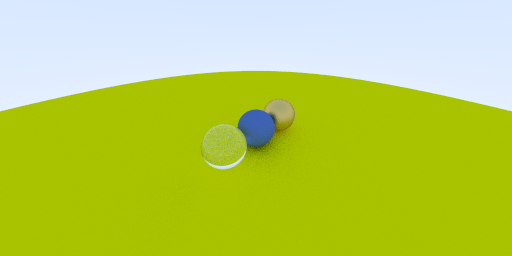

In [10]:
from PIL import Image
import numpy as np
import numpy.random as random


class Camera(object):
    def __init__(self, look_from, look_at, vup, vfov, aspect):
        half_height = np.tan(vfov * np.pi / 180. / 2.)
        half_width = aspect * half_height
        
        self.origin = look_from
        w = look_from - look_at
        w = w / np.linalg.norm(w)
        
        u = np.cross(vup, w)
        u = u / np.linalg.norm(u)
        
        v = np.cross(w, u)
        
        self.horizontal = 2 * half_width * u
        self.vertical = 2 * half_height * v
        self.screen_origin = self.origin - half_width * u - half_height * v - w
        
    def get_ray(self, u, v):
        return Ray(self.origin, self.screen_origin + self.horizontal * u + self.vertical * v)

    
class Ray(object):
    def __init__(self, src, dst):
        delta = (dst - src)
        self.k = delta / np.linalg.norm(delta)
        self.b = src
    
    @property
    def origin(self):
        return self.b
    
    @property
    def direction(self):
        return self.k
    
    def point_at_t(self, t):
        return self.b + t * self.k

    
class HitPoint(object):
    def __init__(self, ray, obj, t, point, normal):
        self.ray = ray
        self.obj = obj
        self.t = t
        self.point = point
        self.normal = normal


def random_in_unit_sphere():
    while True:
        r = 2 * random.random(3) - np.array((1, 1, 1))
        if np.dot(r, r) <= 1:
            return r
        
class Lambertian(object):
    def __init__(self, albedo):
        self.albedo = albedo 
    
    def scatter(self, ray, hit_point):
        n = hit_point.normal
        p = hit_point.point
        target = p + n + random_in_unit_sphere()
        scattered = Ray(p, target)
        return self.albedo, scattered

class Metal(object):
    def __init__(self, albedo, fuzz):
        self.albedo = albedo
        self.fuzz = max(0, min(1., fuzz))
    
    def scatter(self, ray, hit_point):
        v = ray.direction
        n = hit_point.normal
        p = hit_point.point
        reflected = v - 2 * np.dot(v, n) * n + self.fuzz * random_in_unit_sphere()
        scattered = Ray(p, p + reflected)
        return self.albedo, scattered if np.dot(scattered.direction, n) > 0 else None

class Dielectric(object):
    def __init__(self, refractive_indice):
        self.refractive_indice = refractive_indice
    
    def _schlick(self, cosine, ref_idx):
        r0 = (1 - ref_idx) / (1+ ref_idx)
        r0 = r0 * r0
        return r0 + (1 - r0) * np.power((1 - cosine), 5)
        
    def scatter(self, ray, hit_point):
        attenuation = np.array((1., 1., 1.))
        
        v = ray.direction
        n = hit_point.normal
        p = hit_point.point
        reflected = v - 2 * np.dot(v, n) * n
        scattered = Ray(p, p + reflected)
        
        if np.dot(v, n) > 0:
            on = -n
            ni_over_nt = self.refractive_indice
            cosine = self.refractive_indice * np.dot(v, n)
        else:
            on = n
            ni_over_nt = 1/self.refractive_indice
            cosine = - np.dot(v, n)
        
        dt = np.dot(v, on)
        discriminant = 1. - ni_over_nt * ni_over_nt * (1 - dt * dt)
        if discriminant > 0:
            reflect_prob = self._schlick(cosine, self.refractive_indice)
        
            if random.random() > reflect_prob:
                refracted = ni_over_nt * (v - on * dt) - on * np.sqrt(discriminant)
                return attenuation, Ray(p, p + refracted)
        
        reflected = v - 2 * np.dot(v, n) * n
        return attenuation, Ray(p, p + reflected)
            
    
class Sphere(object):
    def __init__(self, center, radius, material):
        self.center = center
        self.radius = radius
        self.material = material
    
    def find_hit_point(self, ray):
        oc = ray.origin - self.center
        a = np.dot(ray.direction, ray.direction)
        b = np.dot(oc, ray.direction)
        c = np.dot(oc, oc) - np.dot(self.radius, self.radius)
        discriminant = b * b - a * c
        
        hit_points = []
        
        if discriminant > 0:
            t1 = (- b - np.sqrt(discriminant))/ a
            p1 = ray.point_at_t(t1)
            n1 = (p1 - self.center) / self.radius
            t2 = (- b + np.sqrt(discriminant))/ a
            p2 = ray.point_at_t(t2)
            n2 = (p2 - self.center) / self.radius
            hit_points.append(HitPoint(ray, self, t1, p1, n1))
            hit_points.append(HitPoint(ray, self, t2, p2, n2))
            
        return hit_points 

def find_hit_point(obj_list, ray):
    hit_points = []
    for obj in obj_list:
        hits = obj.find_hit_point(ray)
        hit_points.extend(hits)
    
    return hit_points

def color(obj_list, ray, depth):    
    if depth >= 0:
        hit_points = find_hit_point(obj_list, ray)
        hit_points = list(filter(lambda x: x.t > 0.001, hit_points))
    
        if hit_points:
            hit_points.sort(key=lambda x: x.t)
            hit_point = hit_points[0]
            m = hit_point.obj.material
            attenuation, scattered = m.scatter(ray, hit_point)
            return attenuation * color(obj_list, scattered, depth - 1) if scattered else np.array((0., 0., 0.))
    
    t = 0.5 * (ray.direction[1] + 1.) 
    c = (1. - t) * np.array((1., 1., 1.)) + t * np.array((0.5, 0.7, 1))
    return c
    
screen_size = (256, 512)
# screen_size = (100, 200)
depth = 4
samples = 50
height, width = screen_size
image_array = np.ones(screen_size, dtype=np.uint32)

obj_list = [
    Sphere(np.array((0, 0, -1.)), 0.5, Lambertian(np.array((0.1, 0.2, 0.5)))), 
    Sphere(np.array((0, -100.5, -1.)), 100, Lambertian(np.array((0.8, 0.8, 0.)))), 
    Sphere(np.array((1., 0, -1.)), 0.5, Metal(np.array((0.8, 0.6, 0.2)), 0.6)), 
    Sphere(np.array((-1, 0, -1.)), 0.5, Dielectric(1.5)), 
    ]

camera = Camera(look_from=np.array((-2, 2, 1)), 
                look_at=np.array((0, 0, -1)), 
                vup=np.array((0, 2, 0)), 
                vfov=90, 
                aspect=width/height)

for x in range(width):
    for y in range(height):
        c = 0
        for s in range(samples):
            u = (x + random.random()) / width 
            v = (y + random.random()) / height
            ray = camera.get_ray(u, v)
            c += color(obj_list, ray, depth)
        
        c = c / samples
        c = np.sqrt(c)
        c = (c * 0xff).astype(np.uint8)
        image_array[height - 1 - y][x] = 0xff000000 + 0x10000 * c[2]+ 0x100 * c[1]+ c[0]

image_array = image_array.astype(np.uint32)
Image.fromarray(image_array, mode="RGBA")

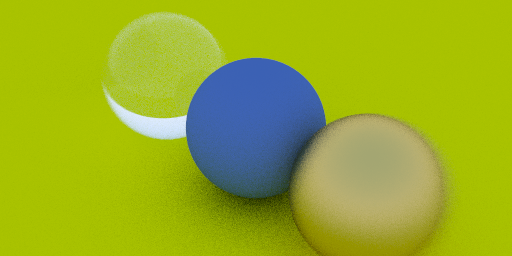

In [1]:
from PIL import Image
import numpy as np
import numpy.random as random


class Camera(object):
    def __init__(self, look_from, look_at, vup, vfov, aspect, aperture, focus_dist):
        half_height = np.tan(vfov * np.pi / 180. / 2.)
        half_width = aspect * half_height
        
        self.origin = look_from
        w = look_from - look_at
        w = w / np.linalg.norm(w)
        
        u = np.cross(vup, w)
        u = u / np.linalg.norm(u)
        
        v = np.cross(w, u)
        
        self.lens_radius = aperture / 2
        
        self.horizontal = 2 * focus_dist * half_width * u
        self.vertical = 2 * focus_dist * half_height * v
        self.screen_origin = self.origin - focus_dist * half_width * u - focus_dist * half_height * v - focus_dist * w
        
    def get_ray(self, u, v):
        rd = self.lens_radius * random_in_unit_disk()
        offset = u * rd[0] + v * rd[1]
        return Ray(self.origin + offset, self.screen_origin + self.horizontal * u + self.vertical * v)

    
class Ray(object):
    def __init__(self, src, dst):
        delta = (dst - src)
        self.k = delta / np.linalg.norm(delta)
        self.b = src
    
    @property
    def origin(self):
        return self.b
    
    @property
    def direction(self):
        return self.k
    
    def point_at_t(self, t):
        return self.b + t * self.k

    
class HitPoint(object):
    def __init__(self, ray, obj, t, point, normal):
        self.ray = ray
        self.obj = obj
        self.t = t
        self.point = point
        self.normal = normal

def random_in_unit_disk():
    while True:
        r = 2 * random.random(2) - np.array((1, 1))
        if np.dot(r, r) <= 1:
            return r

def random_in_unit_sphere():
    while True:
        r = 2 * random.random(3) - np.array((1, 1, 1))
        if np.dot(r, r) <= 1:
            return r
        
class Lambertian(object):
    def __init__(self, albedo):
        self.albedo = albedo 
    
    def scatter(self, ray, hit_point):
        n = hit_point.normal
        p = hit_point.point
        target = p + n + random_in_unit_sphere()
        scattered = Ray(p, target)
        return self.albedo, scattered

class Metal(object):
    def __init__(self, albedo, fuzz):
        self.albedo = albedo
        self.fuzz = max(0, min(1., fuzz))
    
    def scatter(self, ray, hit_point):
        v = ray.direction
        n = hit_point.normal
        p = hit_point.point
        reflected = v - 2 * np.dot(v, n) * n + self.fuzz * random_in_unit_sphere()
        scattered = Ray(p, p + reflected)
        return self.albedo, scattered if np.dot(scattered.direction, n) > 0 else None

class Dielectric(object):
    def __init__(self, refractive_indice):
        self.refractive_indice = refractive_indice
    
    def _schlick(self, cosine, ref_idx):
        r0 = (1 - ref_idx) / (1+ ref_idx)
        r0 = r0 * r0
        return r0 + (1 - r0) * np.power((1 - cosine), 5)
        
    def scatter(self, ray, hit_point):
        attenuation = np.array((1., 1., 1.))
        
        v = ray.direction
        n = hit_point.normal
        p = hit_point.point
        reflected = v - 2 * np.dot(v, n) * n
        scattered = Ray(p, p + reflected)
        
        if np.dot(v, n) > 0:
            on = -n
            ni_over_nt = self.refractive_indice
            cosine = self.refractive_indice * np.dot(v, n)
        else:
            on = n
            ni_over_nt = 1/self.refractive_indice
            cosine = - np.dot(v, n)
        
        dt = np.dot(v, on)
        discriminant = 1. - ni_over_nt * ni_over_nt * (1 - dt * dt)
        if discriminant > 0:
            reflect_prob = self._schlick(cosine, self.refractive_indice)
        
            if random.random() > reflect_prob:
                refracted = ni_over_nt * (v - on * dt) - on * np.sqrt(discriminant)
                return attenuation, Ray(p, p + refracted)
        
        reflected = v - 2 * np.dot(v, n) * n
        return attenuation, Ray(p, p + reflected)
            
    
class Sphere(object):
    def __init__(self, center, radius, material):
        self.center = center
        self.radius = radius
        self.material = material
    
    def find_hit_point(self, ray):
        oc = ray.origin - self.center
        a = np.dot(ray.direction, ray.direction)
        b = np.dot(oc, ray.direction)
        c = np.dot(oc, oc) - np.dot(self.radius, self.radius)
        discriminant = b * b - a * c
        
        hit_points = []
        
        if discriminant > 0:
            t1 = (- b - np.sqrt(discriminant))/ a
            p1 = ray.point_at_t(t1)
            n1 = (p1 - self.center) / self.radius
            t2 = (- b + np.sqrt(discriminant))/ a
            p2 = ray.point_at_t(t2)
            n2 = (p2 - self.center) / self.radius
            hit_points.append(HitPoint(ray, self, t1, p1, n1))
            hit_points.append(HitPoint(ray, self, t2, p2, n2))
            
        return hit_points 

def find_hit_point(obj_list, ray):
    hit_points = []
    for obj in obj_list:
        hits = obj.find_hit_point(ray)
        hit_points.extend(hits)
    
    return hit_points

def color(obj_list, ray, depth):    
    if depth >= 0:
        hit_points = find_hit_point(obj_list, ray)
        hit_points = list(filter(lambda x: x.t > 0.001, hit_points))
    
        if hit_points:
            hit_points.sort(key=lambda x: x.t)
            hit_point = hit_points[0]
            m = hit_point.obj.material
            attenuation, scattered = m.scatter(ray, hit_point)
            return attenuation * color(obj_list, scattered, depth - 1) if scattered else np.array((0., 0., 0.))
    
    t = 0.5 * (ray.direction[1] + 1.) 
    c = (1. - t) * np.array((1., 1., 1.)) + t * np.array((0.5, 0.7, 1))
    return c
    
screen_size = (256, 512)
# screen_size = (100, 200)
depth = 4
samples = 50
height, width = screen_size
image_array = np.ones(screen_size, dtype=np.uint32)

obj_list = [
    Sphere(np.array((0, 0, -1.)), 0.5, Lambertian(np.array((0.1, 0.2, 0.5)))), 
    Sphere(np.array((0, -100.5, -1.)), 100, Lambertian(np.array((0.8, 0.8, 0.)))), 
    Sphere(np.array((1., 0, -1.)), 0.5, Metal(np.array((0.8, 0.6, 0.2)), 0.6)), 
    Sphere(np.array((-1, 0, -1.)), 0.5, Dielectric(1.5)), 
    ]

look_from = np.array((3, 3, 2))
look_at = np.array((0, 0, -1))

camera = Camera(look_from=look_from, 
                look_at=look_at, 
                vup=np.array((0, 1, 0)), 
                vfov=20, 
                aspect=width/height,
                aperture=2.,
                focus_dist=(np.linalg.norm(look_at-look_from))
               )

for x in range(width):
    for y in range(height):
        c = 0
        for s in range(samples):
            u = (x + random.random()) / width 
            v = (y + random.random()) / height
            ray = camera.get_ray(u, v)
            c += color(obj_list, ray, depth)
        
        c = c / samples
        c = np.sqrt(c)
        c = (c * 0xff).astype(np.uint8)
        image_array[height - 1 - y][x] = 0xff000000 + 0x10000 * c[2]+ 0x100 * c[1]+ c[0]

image_array = image_array.astype(np.uint32)
Image.fromarray(image_array, mode="RGBA")